In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('final_data.xlsx')

In [3]:
df.head().style.background_gradient('turbo')

,Unnamed: 0,Patient ID,Agent ID,pincode,patient location,Latitudes and Longitudes (Patient),Latitudes and Longitudes (Agent),Latitudes and Longitudes (Diagnostic Center),Diagnostic Centers,Time slot,shortest distance Agent-Pathlab(m),shortest distance Patient-Pathlab(m),shortest distance Patient-Agent(m),Availabilty time (Patient),Age,Gender,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Time For Sample Collection MM,Time Agent-Pathlab sec,Agent Arrival Time (range) HH:MM,Exact Arrival Time MM
0,0,MD1001,26,500019,Serilingampalle (M),"17.480944, 78.321500","17.476422, 78.327109","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 21:00 (Home),2713,2840,778,09:00 to 10:00,37,Female,2022-01-01 00:00:00,12:04:00,Vitamin B-12,Blood,Vaccum blood collection tube,2022-01-02 00:00:00,11,271.300000,09:05 to 09:55,34
1,1,MD1002,40,500084,Serilingampalle (M),"17.482750, 78.340586","17.473802, 78.335612","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),2490,1378,1126,19:00 to 20:00,29,Male,2022-01-02 00:00:00,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,10,249.000000,19:05 to 19:55,39
2,2,MD1003,19,502032,Ramachandrapuram,"17.518403, 78.310165","17.519385, 78.306378","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),4849,4458,416,14:00 to 15:00,33,Male,2022-01-03 00:00:00,12:24:00,CBC,Blood,Vaccum blood collection tube,2022-01-04 00:00:00,12,484.900000,14:05 to 14:55,24
3,3,MD1004,45,500049,Miyapur,"17.511200, 78.357393","17.488280, 78.384516","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),4348,2316,3843,21:00 to 22:00,62,Female,2022-01-04 00:00:00,13:38:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-01-05 00:00:00,7,434.800000,21:05 to 21:55,39
4,4,MD1005,12,500090,Nizampet,"17.503342, 78.384344","17.513819, 78.360140","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),2725,4377,2818,13:00 to 14:00,80,Male,2022-01-05 00:00:00,16:01:00,TSH,Blood,Vaccum blood collection tube,2022-01-06 00:00:00,10,272.500000,13:05 to 13:55,39


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df.columns

Index(['Patient ID', 'Agent ID', 'pincode', 'patient location',
       'Latitudes and Longitudes (Patient)',
       'Latitudes and Longitudes (Agent)',
       'Latitudes and Longitudes (Diagnostic Center)', 'Diagnostic Centers',
       'Time slot', 'shortest distance Agent-Pathlab(m)',
       'shortest distance Patient-Pathlab(m)',
       'shortest distance Patient-Agent(m)', 'Availabilty time (Patient)',
       'Age', 'Gender', 'Test Booking Date', 'Test Booking Time HH:MM',
       'Test name', 'Sample', 'Way Of Storage Of Sample',
       'Sample Collection Date', ' Time For Sample Collection MM',
       'Time Agent-Pathlab sec', 'Agent Arrival Time (range) HH:MM',
       'Exact Arrival Time MM'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Patient ID                                    1304 non-null   object        
 1   Agent ID                                      1304 non-null   int64         
 2   pincode                                       1304 non-null   object        
 3   patient location                              1304 non-null   object        
 4   Latitudes and Longitudes (Patient)            1304 non-null   object        
 5   Latitudes and Longitudes (Agent)              1304 non-null   object        
 6   Latitudes and Longitudes (Diagnostic Center)  1304 non-null   object        
 7   Diagnostic Centers                            1304 non-null   object        
 8   Time slot                                     1304 non-null   object

In [7]:
df.rename(columns={'shortest distance Agent-Pathlab(m)' : 'Distance Agent-Pathlab', ##unit = meters
                   'shortest distance Patient-Pathlab(m)' : 'Distance Patient-Pathlab',  ##unit = meters
                   'shortest distance Patient-Agent(m)' : 'Distance Patient-Agent',  ##unit = meters
                   'Availabilty time (Patient)' : 'Patient Availabilty',  ##range format
                   'Test Booking Date' : 'Booking Date',  
                   'Test Booking Time HH:MM' : 'Booking Time',
                   'Way Of Storage Of Sample' : 'Specimen Storage',
                   ' Time For Sample Collection MM' : 'Specimen collection Time',
                   'Time Agent-Pathlab sec' : 'Agent-Pathlab sec',
                   'Agent Arrival Time (range) HH:MM' : 'Agent Arrival Time',
                   'Exact Arrival Time MM' : 'Exact Arrival Time'   ##output time
                  }, inplace=True)

In [8]:
df.duplicated().any()

False

In [9]:
df.isna().any()

Patient ID                                      False
Agent ID                                        False
pincode                                         False
patient location                                False
Latitudes and Longitudes (Patient)              False
Latitudes and Longitudes (Agent)                False
Latitudes and Longitudes (Diagnostic Center)    False
Diagnostic Centers                              False
Time slot                                       False
Distance Agent-Pathlab                          False
Distance Patient-Pathlab                        False
Distance Patient-Agent                          False
Patient Availabilty                             False
Age                                             False
Gender                                          False
Booking Date                                    False
Booking Time                                    False
Test name                                       False
Sample                      

In [10]:
df.columns

Index(['Patient ID', 'Agent ID', 'pincode', 'patient location',
       'Latitudes and Longitudes (Patient)',
       'Latitudes and Longitudes (Agent)',
       'Latitudes and Longitudes (Diagnostic Center)', 'Diagnostic Centers',
       'Time slot', 'Distance Agent-Pathlab', 'Distance Patient-Pathlab',
       'Distance Patient-Agent', 'Patient Availabilty', 'Age', 'Gender',
       'Booking Date', 'Booking Time', 'Test name', 'Sample',
       'Specimen Storage', 'Sample Collection Date',
       'Specimen collection Time', 'Agent-Pathlab sec', 'Agent Arrival Time',
       'Exact Arrival Time'],
      dtype='object')

<AxesSubplot:xlabel='Exact Arrival Time', ylabel='Density'>

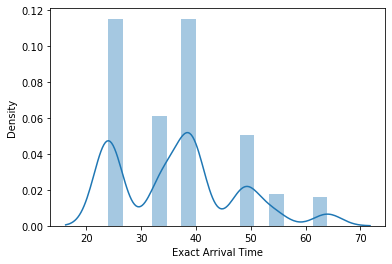

In [11]:
sns.distplot(df['Exact Arrival Time'])

In [11]:
ID_columns = df[['Patient ID', 'Agent ID', 'pincode']]
numerical_columns = df[['Age', 'Distance Agent-Pathlab', 'Distance Patient-Pathlab', 'Distance Patient-Agent', 
                        'Specimen collection Time' , 'Agent-Pathlab sec', 'Exact Arrival Time']]
categorical_columns = df[['patient location', 'Diagnostic Centers', 'Time slot', 'Patient Availabilty', 'Gender', 
                          'Booking Date', 'Specimen Storage', 'Sample Collection Date', 'Agent Arrival Time']]

In [12]:
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1304 non-null   int64  
 1   Distance Agent-Pathlab    1304 non-null   int64  
 2   Distance Patient-Pathlab  1304 non-null   int64  
 3   Distance Patient-Agent    1304 non-null   int64  
 4   Specimen collection Time  1304 non-null   int64  
 5   Agent-Pathlab sec         1304 non-null   float64
 6   Exact Arrival Time        1304 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 71.4 KB


In [13]:
categorical_columns.head()

,patient location,Diagnostic Centers,Time slot,Patient Availabilty,Gender,Booking Date,Specimen Storage,Sample Collection Date,Agent Arrival Time
0,Serilingampalle (M),Medquest Diagnostics Center,06:00 to 21:00 (Home),09:00 to 10:00,Female,2022-01-01,Vaccum blood collection tube,2022-01-02,09:05 to 09:55
1,Serilingampalle (M),Medquest Diagnostics Center,19:00 to 22:00 (working person),19:00 to 20:00,Male,2022-01-02,Vaccum blood collection tube,2022-01-03,19:05 to 19:55
2,Ramachandrapuram,Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),14:00 to 15:00,Male,2022-01-03,Vaccum blood collection tube,2022-01-04,14:05 to 14:55
3,Miyapur,Medquest Diagnostics Center,19:00 to 22:00 (working person),21:00 to 22:00,Female,2022-01-04,Vaccum blood collection tube,2022-01-05,21:05 to 21:55
4,Nizampet,Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),13:00 to 14:00,Male,2022-01-05,Vaccum blood collection tube,2022-01-06,13:05 to 13:55


In [15]:
list(categorical_columns['Diagnostic Centers'].unique())

['Medquest Diagnostics Center',
 'Vijaya Diagnostic Center',
 'Apollo Diagnostics',
 'Lucid Medical Diagnostics',
 'Vivaa Diagnostic Center',
 'Medifine Diagnostic Center',
 'Diamond Diagnostic Center',
 'Tesla Diagnostics',
 'Pronto Diagnostics Center',
 'Sri Sai Diagnostic Center',
 'Vijaya Diagonstic Center',
 'Medquest Diagnostics',
 'Pronto Diagnostics',
 'Viva Diagnostic']

<AxesSubplot:>

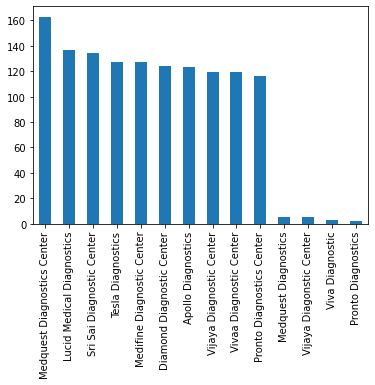

In [16]:
categorical_columns['Diagnostic Centers'].value_counts().plot(kind = 'bar')

In [17]:
def name_change(text):
    if text == 'Medquest Diagnostics Center' or text == 'Medquest Diagnostics':
        return 'Medquest Diagnostics Center'
    elif text == 'Pronto Diagnostics' or text == 'Pronto Diagnostics Center':
        return 'Pronto Diagnostics Center'
    elif text == 'Vijaya Diagonstic Center' or text == 'Vijaya Diagnostic Center':
        return 'Vijaya Diagnostic Center'
    elif text == 'Viva Diagnostic' or text == 'Vivaa Diagnostic Center':
        return 'Vivaa Diagnostic Center'
    else:
        return text

In [18]:
categorical_columns['Diagnostic Centers'] = categorical_columns['Diagnostic Centers'].apply(name_change)

<AxesSubplot:>

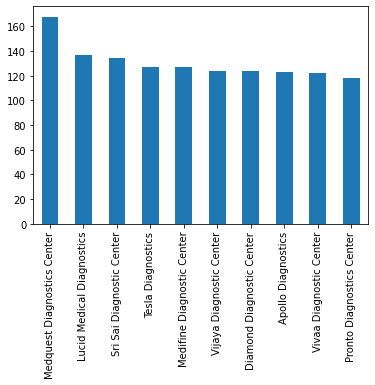

In [19]:
categorical_columns['Diagnostic Centers'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

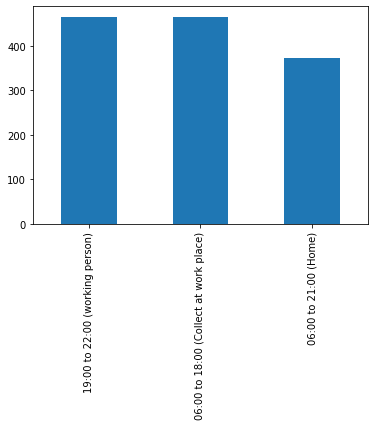

In [20]:
categorical_columns['Time slot'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

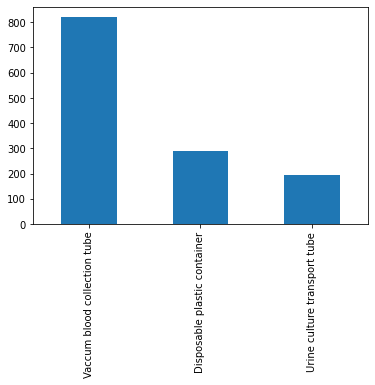

In [21]:
categorical_columns['Specimen Storage'].value_counts().plot(kind = 'bar')

In [22]:
len(categorical_columns['Patient Availabilty'].unique())

17

<AxesSubplot:>

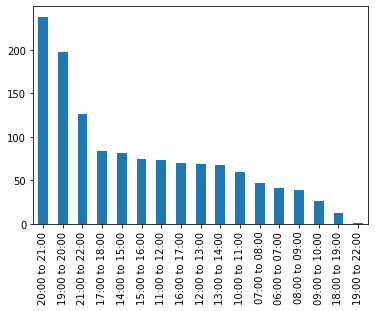

In [23]:
categorical_columns['Patient Availabilty'].value_counts().plot(kind = 'bar')

In [24]:
len(categorical_columns['Agent Arrival Time'].unique())

16

<AxesSubplot:>

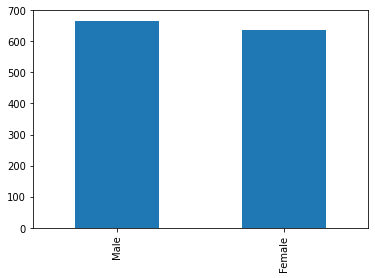

In [25]:
categorical_columns['Gender'].value_counts().plot(kind = 'bar')

In [14]:
new_df = pd.concat([ID_columns,
                    categorical_columns[['Diagnostic Centers', 'Time slot', 'Patient Availabilty', 'Gender',
                                         'Specimen Storage', 'Agent Arrival Time']],
                    numerical_columns[['Distance Patient-Agent', 'Specimen collection Time', 'Exact Arrival Time']]
                   ], axis = 1)

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient ID                1304 non-null   object
 1   Agent ID                  1304 non-null   int64 
 2   pincode                   1304 non-null   object
 3   Diagnostic Centers        1304 non-null   object
 4   Time slot                 1304 non-null   object
 5   Patient Availabilty       1304 non-null   object
 6   Gender                    1304 non-null   object
 7   Specimen Storage          1304 non-null   object
 8   Agent Arrival Time        1304 non-null   object
 9   Distance Patient-Agent    1304 non-null   int64 
 10  Specimen collection Time  1304 non-null   int64 
 11  Exact Arrival Time        1304 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 122.4+ KB


In [17]:
final = new_df[new_df['Distance Patient-Agent'] != 0]

In [18]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1303
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient ID                1296 non-null   object
 1   Agent ID                  1296 non-null   int64 
 2   pincode                   1296 non-null   object
 3   Diagnostic Centers        1296 non-null   object
 4   Time slot                 1296 non-null   object
 5   Patient Availabilty       1296 non-null   object
 6   Gender                    1296 non-null   object
 7   Specimen Storage          1296 non-null   object
 8   Agent Arrival Time        1296 non-null   object
 9   Distance Patient-Agent    1296 non-null   int64 
 10  Specimen collection Time  1296 non-null   int64 
 11  Exact Arrival Time        1296 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 131.6+ KB


<AxesSubplot:xlabel='Distance Patient-Agent', ylabel='Density'>

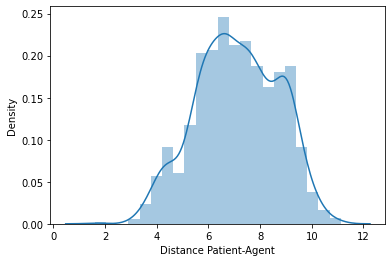

In [20]:
sns.distplot(np.log(final['Distance Patient-Agent']))

In [21]:
for col in final.columns[:]:
    print(col, ' : ', len(final[col].unique()), 'Unique Values')

Patient ID  :  1239 Unique Values
Agent ID  :  41 Unique Values
pincode  :  76 Unique Values
Diagnostic Centers  :  14 Unique Values
Time slot  :  3 Unique Values
Patient Availabilty  :  17 Unique Values
Gender  :  2 Unique Values
Specimen Storage  :  3 Unique Values
Agent Arrival Time  :  16 Unique Values
Distance Patient-Agent  :  975 Unique Values
Specimen collection Time  :  16 Unique Values
Exact Arrival Time  :  6 Unique Values


In [22]:
final.describe()

,Agent ID,Distance Patient-Agent,Specimen collection Time,Exact Arrival Time
count,1296.000000,1296.000000,1296.000000,1296.000000
mean,29.865741,3565.704475,12.558642,36.750772
std,11.579126,5926.156972,4.623554,10.861305
min,10.000000,5.000000,5.000000,24.000000
25%,20.000000,392.000000,9.000000,24.000000
50%,30.000000,1195.500000,13.000000,39.000000
75%,40.000000,4215.750000,17.000000,39.000000
max,50.000000,67593.000000,20.000000,64.000000


In [23]:
final.drop(['Patient ID', 'pincode'], axis = 1, inplace = True)

In [24]:
final['Distance Patient-Agent'] = np.log(final['Distance Patient-Agent'])

In [25]:
final = final[final['Patient Availabilty'] != '19:00 to 22:00']

## Model Buliding

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC 

In [28]:
#final['Patient Availabilty']

In [29]:
final['Patient Availabilty From'] = final['Patient Availabilty'].apply(lambda x:x.split(':')[0])

In [30]:
a = final['Patient Availabilty'].apply(lambda x:x.split('to')[1])
final['Patient Availabilty To'] = a.apply(lambda x:x.split(':')[0])

In [31]:
b = final['Agent Arrival Time'].apply(lambda x:x.split('to')[1])
final['Agent Arrive Before'] = b.apply(lambda x:x.split(':')[0])

In [32]:
final['Patient Availabilty From'] = final['Patient Availabilty From'].astype('int64')
final['Patient Availabilty To'] = final['Patient Availabilty To'].astype('int64')
final['Agent Arrive Before'] = final['Agent Arrive Before'].astype('int64')

In [33]:
final1 = final.drop(['Patient Availabilty', 'Agent Arrival Time', 'Diagnostic Centers'], axis = 1)

In [34]:
final1.head()

,Agent ID,Time slot,Gender,Specimen Storage,Distance Patient-Agent,Specimen collection Time,Exact Arrival Time,Patient Availabilty From,Patient Availabilty To,Agent Arrive Before
0,26,06:00 to 21:00 (Home),Female,Vaccum blood collection tube,6.656727,11,34,9,10,9
1,40,19:00 to 22:00 (working person),Male,Vaccum blood collection tube,7.026427,10,39,19,20,19
2,19,06:00 to 18:00 (Collect at work place),Male,Vaccum blood collection tube,6.030685,12,24,14,15,14
3,45,19:00 to 22:00 (working person),Female,Vaccum blood collection tube,8.254009,7,39,21,22,21
4,12,06:00 to 18:00 (Collect at work place),Male,Vaccum blood collection tube,7.943783,10,39,13,14,13


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
final1['Time slot'] = le.fit_transform(final1['Time slot'])
final1['Gender'] = le.fit_transform(final1['Gender'])
final1['Specimen Storage'] = le.fit_transform(final1['Specimen Storage'])

In [38]:
final1.head(3)

,Agent ID,Time slot,Gender,Specimen Storage,Distance Patient-Agent,Specimen collection Time,Exact Arrival Time,Patient Availabilty From,Patient Availabilty To,Agent Arrive Before
0,26,1,0,2,6.656727,11,34,9,10,9
1,40,2,1,2,7.026427,10,39,19,20,19
2,19,0,1,2,6.030685,12,24,14,15,14


In [39]:
variables = final1.drop(['Exact Arrival Time'], axis = 1)
target = final1[['Exact Arrival Time']]

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(variables, target, test_size=0.3)

In [42]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred))) 
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.6195
Classification Report: 
               precision    recall  f1-score   support

          24       0.91      0.99      0.95       130
          34       0.00      0.00      0.00        63
          39       0.52      1.00      0.68       106
          49       0.14      0.12      0.13        49
          54       0.00      0.00      0.00        22
          64       0.00      0.00      0.00        19

    accuracy                           0.62       389
   macro avg       0.26      0.35      0.29       389
weighted avg       0.46      0.62      0.52       389



# Final Model 

In [43]:
lr1 = LogisticRegression(multi_class='ovr',
                           penalty = 'l2',
                           solver='newton-cg',
                           C = 16.0,
                           fit_intercept=True,
                           class_weight='balanced',
                           random_state=50
                          ) 
lr1.fit(xtrain, ytrain)
ypred = lr1.predict(xtest)
print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred))) 
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.8766
Classification Report: 
               precision    recall  f1-score   support

          24       1.00      1.00      1.00       130
          34       0.81      0.95      0.88        63
          39       0.97      0.85      0.90       106
          49       0.64      1.00      0.78        49
          54       0.25      0.05      0.08        22
          64       1.00      0.58      0.73        19

    accuracy                           0.88       389
   macro avg       0.78      0.74      0.73       389
weighted avg       0.87      0.88      0.86       389



In [51]:
#pickle.dump(lr1, open('logistic_reg.pkl', 'wb'))
#pickle.dump(final1, open('dataset.pkl', 'wb'))

# ------------------------------------------------------------------------------

In [52]:
from haversine import haversine

In [53]:
lat1 = float(input('latitude 1 :'))
lon1 = float(input('longitude 1 :'))
lat2 = float(input('latitude 2 :'))
lon2 = float(input('longitude 2 :'))

loc1 = (lat1, lon1)
loc2 = (lat2, lon2)
distance = haversine(loc1, loc2, unit='m')
print(int(distance))

latitude 1 :23.2354657
longitude 1 :34.2436
latitude 2 :35.34556
longitude 2 :23.24356
1715280
